# ecRad numerical gprof

*Last edited: 2024-06-27*

References:

- <https://github.com/ecmwf-ifs/ecrad>
- <https://github.com/ecmwf-ifs/fiat>
- <https://confluence.ecmwf.int/display/ECRAD>
- <https://confluence.ecmwf.int/display/ECRAD/ecRad+practical>
- <https://github.com/ecmwf-ifs/ecrad/blob/master/practical/ecrad_practical.pdf>

Build:

```bash
$ cd ecrad
$ make OPTFLAGS=-Og DEBUGFLAGS="-g -pg"
```

In [1]:
%cd ecrad/bin

/home/x/jlab/ukk23/ecrad/bin


In [2]:
! ./ecrad --help

STOP Usage: ecrad config.nam input_file.nc output_file.nc


In [3]:
%cd ../practical

/home/x/jlab/ukk23/ecrad/practical


In [5]:
! ./ecrad --help

STOP Usage: ecrad config.nam input_file.nc output_file.nc


## Run ecrad (gprof)

In [6]:
! ./ecrad config.nam era5slice.nc control.nc

-------------------------- OFFLINE ECRAD RADIATION SCHEME --------------------------
Copyright (C) 2014- ECMWF
Contact: Robin Hogan (r.j.hogan@ecmwf.int)
Floating-point precision: double
General settings:
  Data files expected in "data"
  Clear-sky calculations are ON                              (do_clear=T)
  Saving intermediate radiative properties OFF               (do_save_radiative_properties=F)
  Saving spectral flux profiles OFF                          (do_save_spectral_flux=F)
  Shortwave gas model is "RRTMG-IFS"                         (i_gas_model_sw=1)
  Longwave gas model is "RRTMG-IFS"                          (i_gas_model_lw=1)
  Aerosols are ON                                            (use_aerosols=T)
  General aerosol optics OFF                                 (use_general_aerosol_optics=F)
  Clouds are ON
  Do cloud/aerosol/surface SW properties per g-point ON      (do_cloud_aerosol_per_sw_g_point=T)
  Do cloud/aerosol/surface LW properties per g-point ON      (do_

In [7]:
%%bash
source ${HOME}/conda/bin/activate tf2
./plot_output.py era5slice.nc control.nc

overwriting variable ['XLA_FLAGS', 'LD_LIBRARY_PATH']


Plotting output to ./era5slice_control.png


In [1]:
from PIL import Image
from IPython.display import display

In [6]:
%pwd

'/home/x/jlab/ukk23/ecrad/practical'

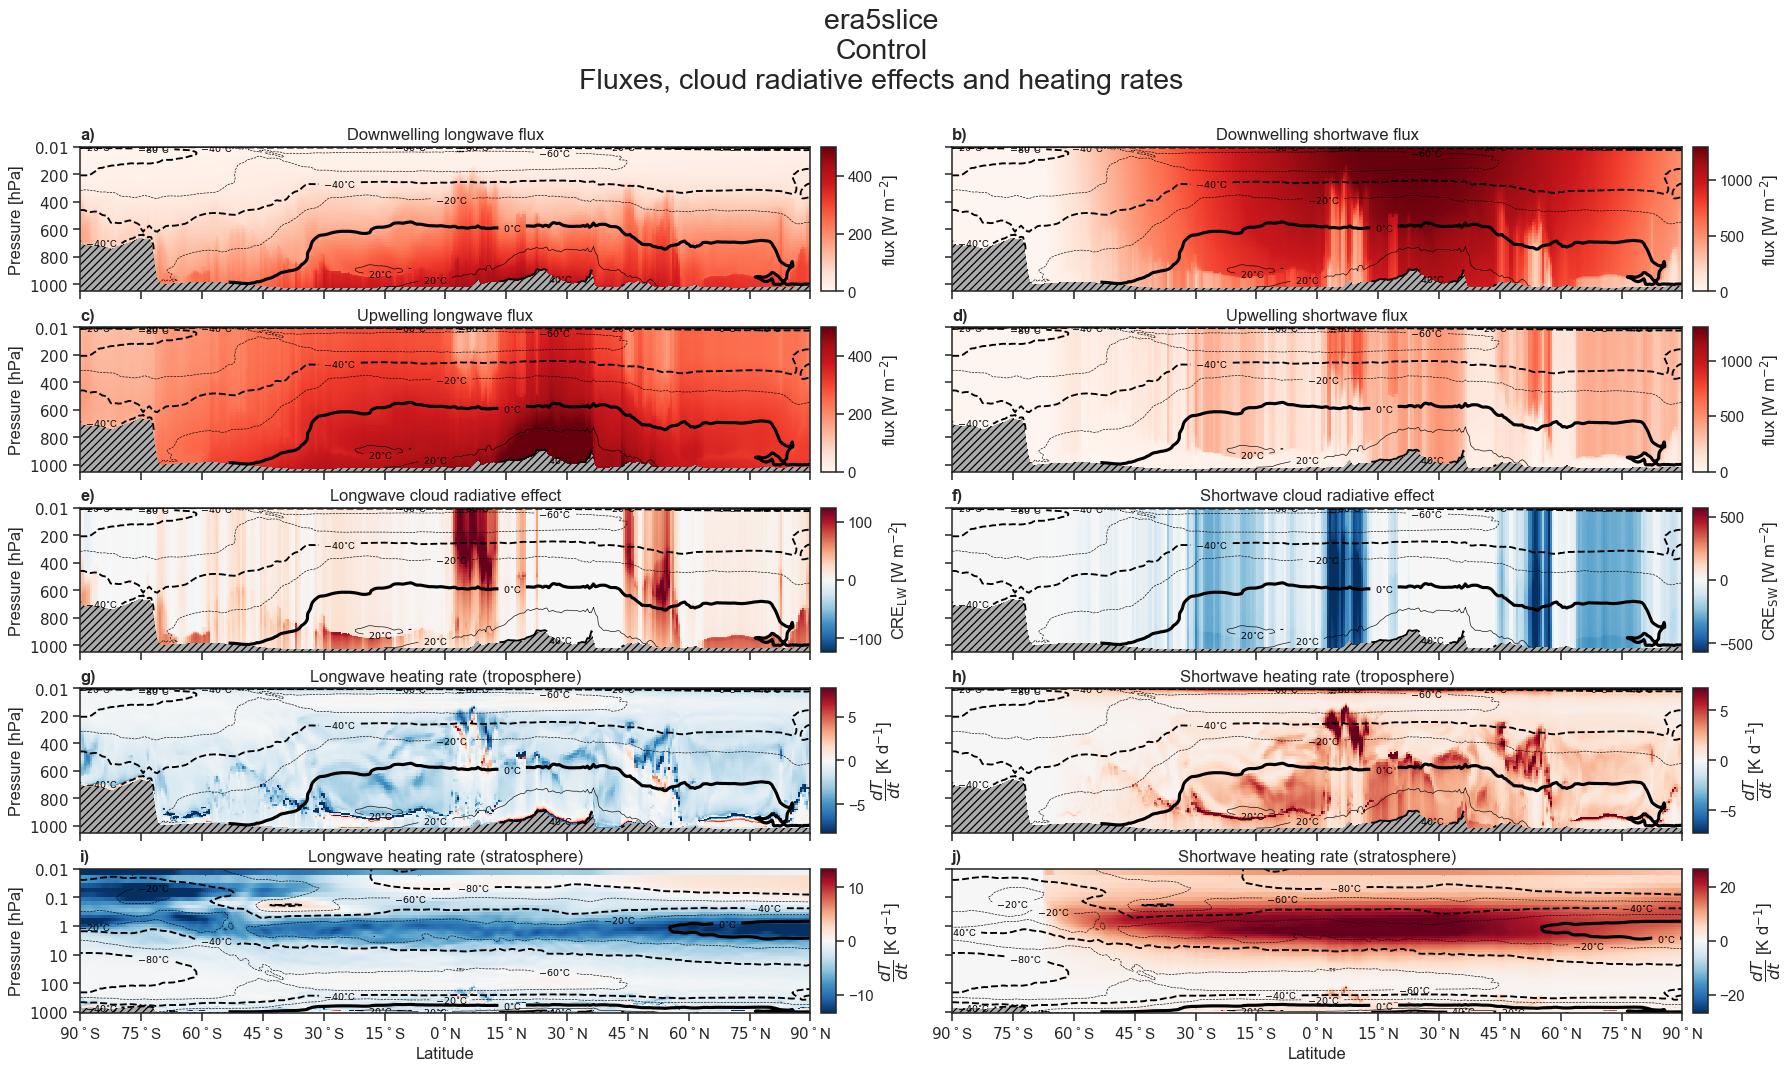

In [10]:
display(Image.open('era5slice_control.png'))

To plot profiles of the outputs at a latitude of 10◦N :

In [11]:
%%bash
source ${HOME}/conda/bin/activate tf2
./plot_output_profile.py 10 era5slice.nc control.nc

overwriting variable ['LD_LIBRARY_PATH', 'XLA_FLAGS']


Plotting output profiles to ./era5slice_control_profile_10N.png


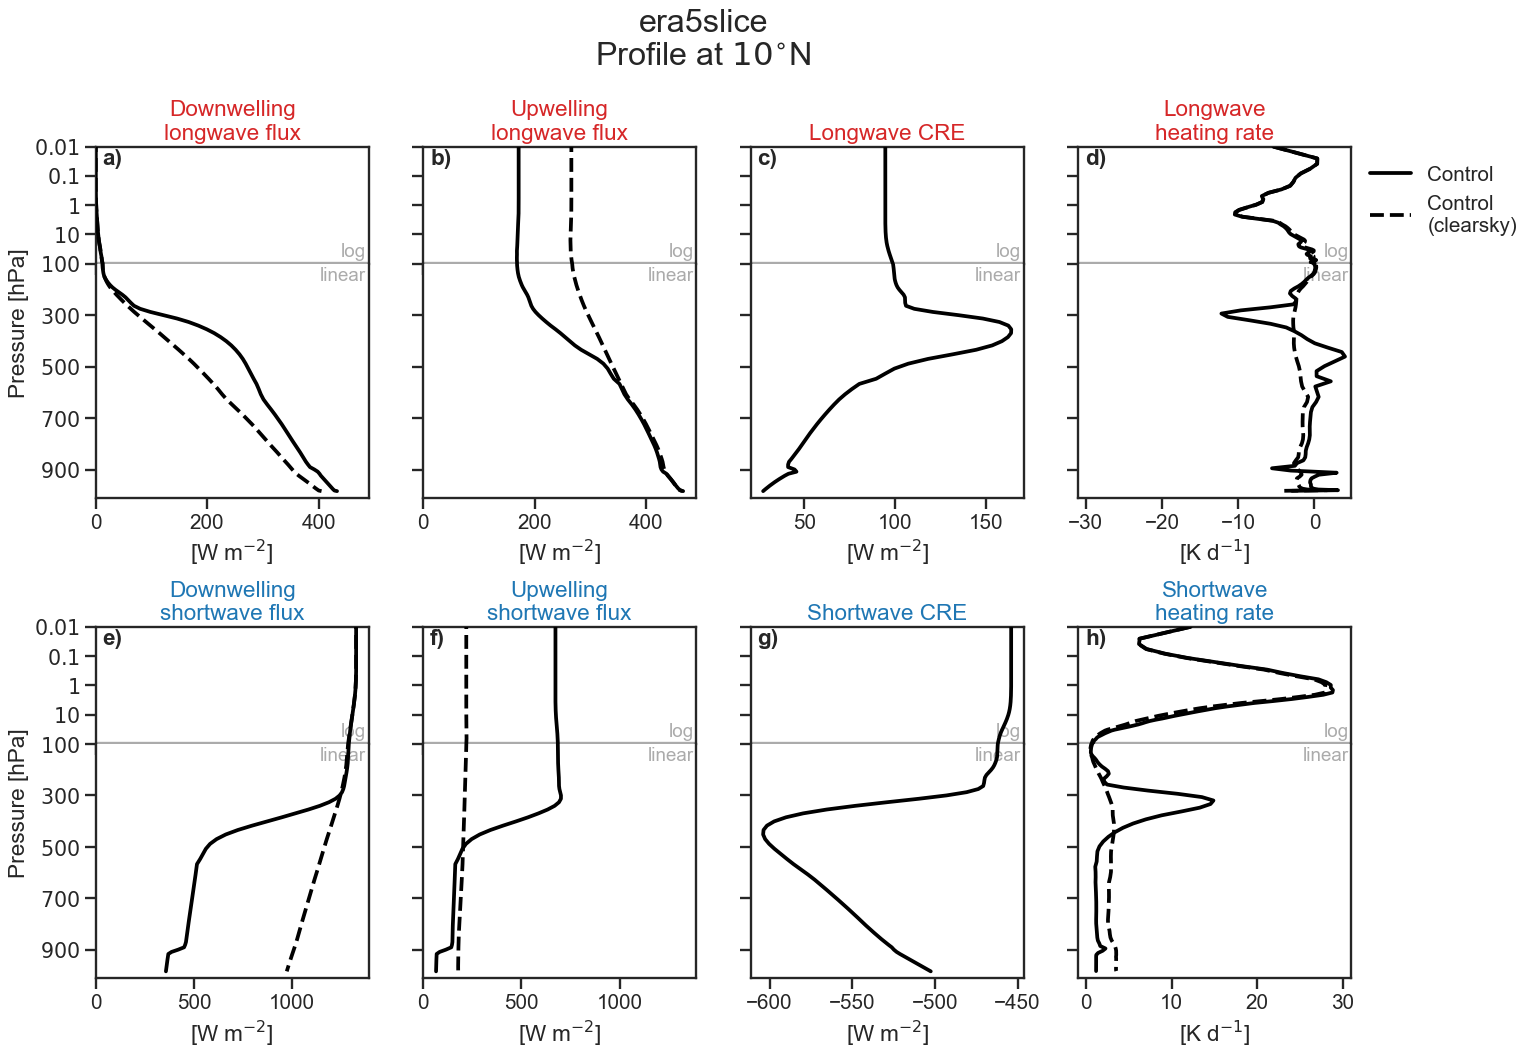

In [12]:
display(Image.open('era5slice_control_profile_10N.png'))

Plots the surface and top-of-atmosphere fluxes for all latitudes:

In [13]:
%%bash
source ${HOME}/conda/bin/activate tf2
./plot_output_scalar.py era5slice.nc control.nc

overwriting variable ['XLA_FLAGS', 'LD_LIBRARY_PATH']


Plotting integrated and TOA outputs to .//era5slice_control_surface_and_TOA.png


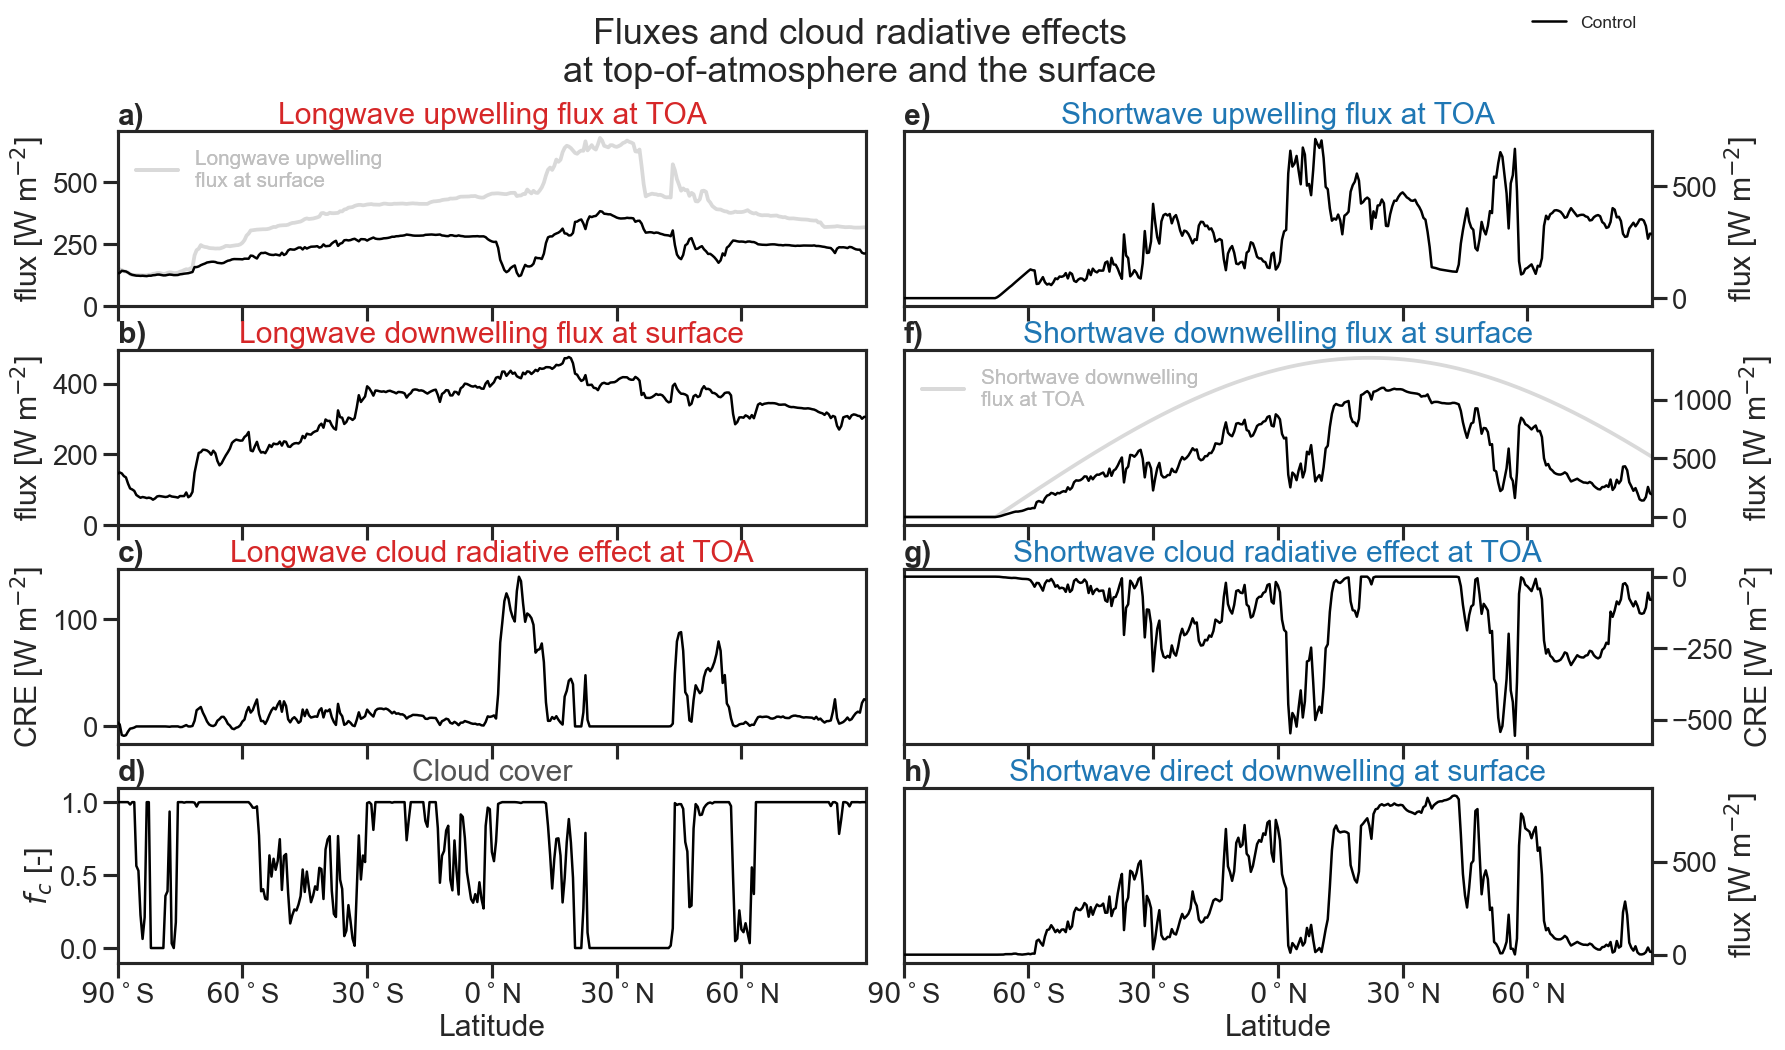

In [14]:
display(Image.open('era5slice_control_surface_and_TOA.png'))

In [15]:
%%bash
source ${HOME}/conda/bin/activate tf2
./plot_input_profile.py 10 era5slice.nc

overwriting variable ['LD_LIBRARY_PATH', 'XLA_FLAGS']


Plotting inputs profile to ./era5slice_profile_10N.png


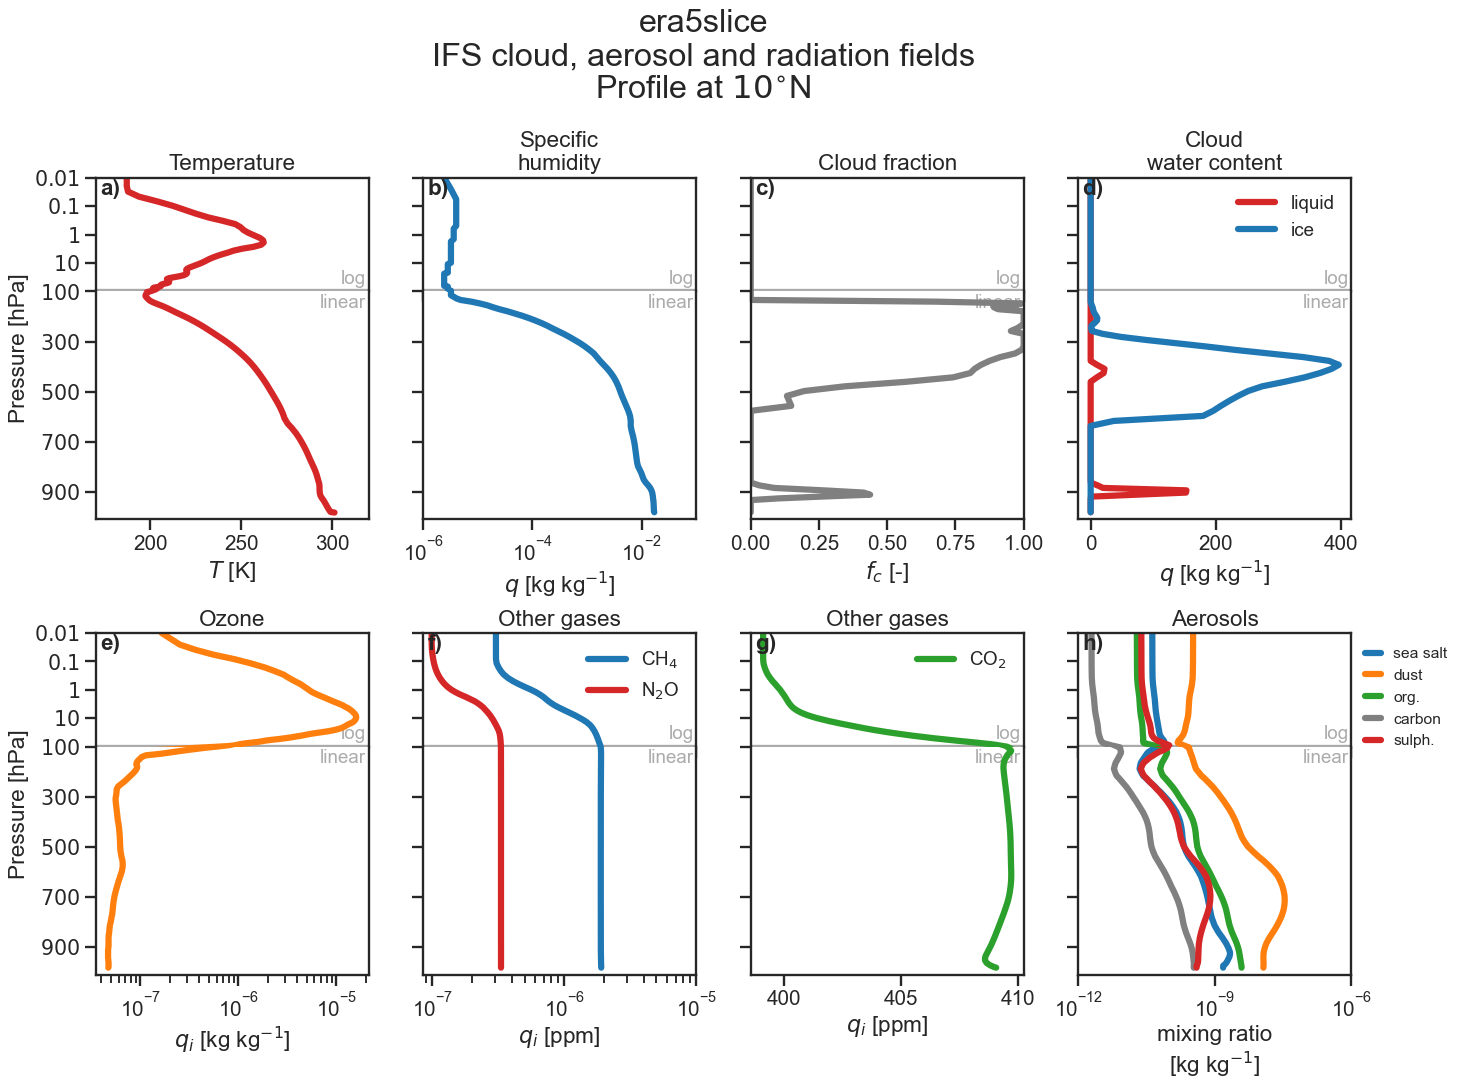

In [16]:
display(Image.open('era5slice_profile_10N.png'))

## GPROF

In [8]:
! gprof ./ecrad > ../../report-gprof-ecrad-2024-07-26.txt

In [9]:
! cat ../../report-gprof-ecrad-2024-07-26.txt

Flat profile:

Each sample counts as 0.01 seconds.
  %   cumulative   self              self     total           
 time   seconds   seconds    calls  ms/call  ms/call  name    
 17.42      0.27     0.27       12    22.50    34.06  __radiation_tripleclouds_sw_MOD_solver_tripleclouds_sw
 12.90      0.47     0.20       12    16.67    49.17  __radiation_ifs_rrtm_MOD_gas_optics
 12.90      0.67     0.20       12    16.67    30.10  __radiation_tripleclouds_lw_MOD_solver_tripleclouds_lw
  9.68      0.82     0.15       11    13.64    13.64  __radiation_aerosol_optics_MOD_add_aerosol_optics
  7.74      0.94     0.12     4817     0.02     0.02  __radiation_two_stream_MOD_calc_ref_trans_sw
  4.52      1.01     0.07       12     5.83     5.83  __radiation_ifs_rrtm_MOD_planck_function_atmos
  3.87      1.07     0.06      358     0.17     0.17  __radiation_two_stream_MOD_calc_no_scattering_transmittance_lw
  2.58      1.11     0.04    21355     0.00     0.00  __radiation_matrix_MOD_singlemat_x_vec
 

## Environment

In [1]:
%%bash
source ${HOME}/conda/bin/activate tf2
conda export --file requirements.yml

overwriting variable ['XLA_FLAGS', 'LD_LIBRARY_PATH']
